In [7]:
ratio = []

In [8]:
### Import TorchhVision Models for Keypoint Detection
import torch
from torchvision.models.detection import keypointrcnn_resnet50_fpn, KeypointRCNN_ResNet50_FPN_Weights

weights = KeypointRCNN_ResNet50_FPN_Weights.COCO_V1
model = keypointrcnn_resnet50_fpn(weights=weights)
transforms = weights.transforms()


model.eval().to("cpu")

KeypointRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(640, 672, 704, 736, 768, 800), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.

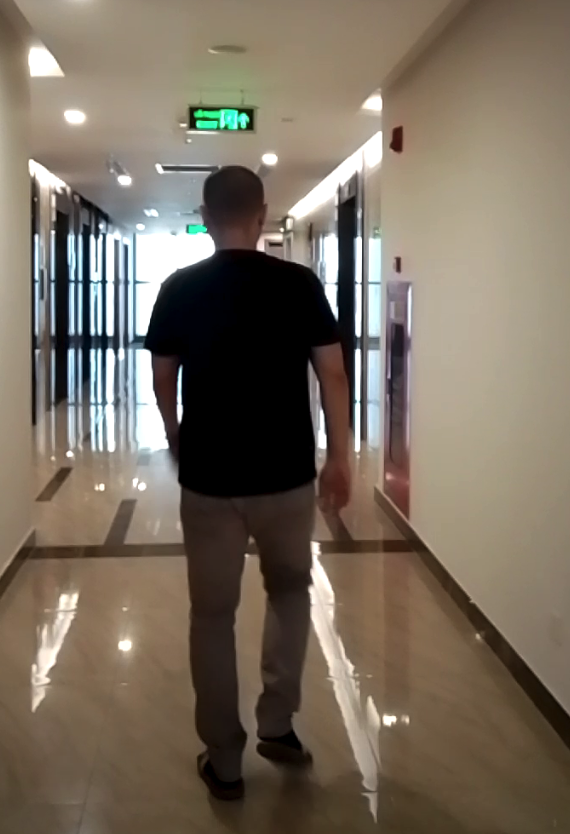

In [9]:
### Load Inference Image with PIL
import os
from PIL import Image

image = Image.open(os.path.join("Nov24","test.png"))
image = image.convert("RGB")
image

In [10]:
### Convert Image to Tensor format
person_matrix = transforms(image)
person_matrix 

tensor([[[0.4235, 0.4235, 0.4235,  ..., 0.4039, 0.4039, 0.4039],
         [0.4157, 0.4196, 0.4157,  ..., 0.4039, 0.4039, 0.4039],
         [0.4118, 0.4157, 0.4118,  ..., 0.4078, 0.4078, 0.4078],
         ...,
         [0.3176, 0.3216, 0.3176,  ..., 0.2941, 0.2941, 0.2941],
         [0.3176, 0.3216, 0.3176,  ..., 0.2941, 0.2941, 0.2941],
         [0.3176, 0.3176, 0.3176,  ..., 0.2980, 0.2941, 0.2941]],

        [[0.3647, 0.3647, 0.3647,  ..., 0.3490, 0.3490, 0.3490],
         [0.3529, 0.3569, 0.3529,  ..., 0.3490, 0.3490, 0.3490],
         [0.3490, 0.3529, 0.3490,  ..., 0.3529, 0.3529, 0.3529],
         ...,
         [0.2706, 0.2745, 0.2706,  ..., 0.2510, 0.2510, 0.2510],
         [0.2706, 0.2745, 0.2706,  ..., 0.2510, 0.2510, 0.2510],
         [0.2706, 0.2706, 0.2706,  ..., 0.2510, 0.2510, 0.2510]],

        [[0.3059, 0.3059, 0.3059,  ..., 0.2863, 0.2863, 0.2863],
         [0.2941, 0.2980, 0.2941,  ..., 0.2863, 0.2863, 0.2863],
         [0.2902, 0.2941, 0.2902,  ..., 0.2902, 0.2902, 0.

In [11]:
### Make Keypoints Prediction on Model
predictions = model([person_matrix.to("cpu")])
predictions

[{'boxes': tensor([[146.5480, 160.1680, 358.9763, 797.0998]], grad_fn=<StackBackward0>),
  'labels': tensor([1]),
  'scores': tensor([0.9999], grad_fn=<IndexBackward0>),
  'keypoints': tensor([[[264.8400, 222.5076,   1.0000],
           [244.2366, 213.2457,   1.0000],
           [264.8400, 216.0955,   1.0000],
           [207.2926, 216.0955,   1.0000],
           [261.9982, 216.0955,   1.0000],
           [181.0055, 285.9157,   1.0000],
           [296.8108, 282.3535,   1.0000],
           [160.4021, 369.9850,   1.0000],
           [334.4653, 374.2598,   1.0000],
           [173.1904, 430.5434,   1.0000],
           [340.1490, 458.3291,   1.0000],
           [206.5821, 469.7283,   1.0000],
           [286.1539, 476.1404,   1.0000],
           [212.2658, 615.0684,   1.0000],
           [289.7062, 592.2700,   1.0000],
           [224.3437, 763.2583,   1.0000],
           [279.0493, 726.2109,   1.0000]]], grad_fn=<CopySlices>),
  'keypoints_scores': tensor([[ 4.5412,  4.0732,  4.6520, 16.

In [12]:
### Filter for main prediction target
keypoints = predictions[0]['keypoints']
scores = predictions[0]['scores']
boxes = predictions[0]['boxes']

confidence_threshold = 0.999
idx = torch.where(scores > confidence_threshold)[0]
idx

tensor([0])

In [13]:
kp = torch.unsqueeze(keypoints[idx][0], dim=0)
kp.size()

torch.Size([1, 17, 3])

In [14]:
### Drawing Keypoints on Image
from torchvision.utils import draw_keypoints
from torchvision.transforms.functional import pil_to_tensor

tensor_image = pil_to_tensor(image)

keypoints_image = draw_keypoints(
    tensor_image, kp, colors="blue", radius=2
)

keypoints_image

tensor([[[108, 108, 108,  ..., 103, 103, 103],
         [106, 107, 106,  ..., 103, 103, 103],
         [105, 106, 105,  ..., 104, 104, 104],
         ...,
         [ 81,  82,  81,  ...,  75,  75,  75],
         [ 81,  82,  81,  ...,  75,  75,  75],
         [ 81,  81,  81,  ...,  76,  75,  75]],

        [[ 93,  93,  93,  ...,  89,  89,  89],
         [ 90,  91,  90,  ...,  89,  89,  89],
         [ 89,  90,  89,  ...,  90,  90,  90],
         ...,
         [ 69,  70,  69,  ...,  64,  64,  64],
         [ 69,  70,  69,  ...,  64,  64,  64],
         [ 69,  69,  69,  ...,  64,  64,  64]],

        [[ 78,  78,  78,  ...,  73,  73,  73],
         [ 75,  76,  75,  ...,  73,  73,  73],
         [ 74,  75,  74,  ...,  74,  74,  74],
         ...,
         [ 50,  51,  50,  ...,  43,  43,  43],
         [ 50,  51,  50,  ...,  43,  43,  43],
         [ 50,  50,  50,  ...,  43,  43,  43]]], dtype=torch.uint8)

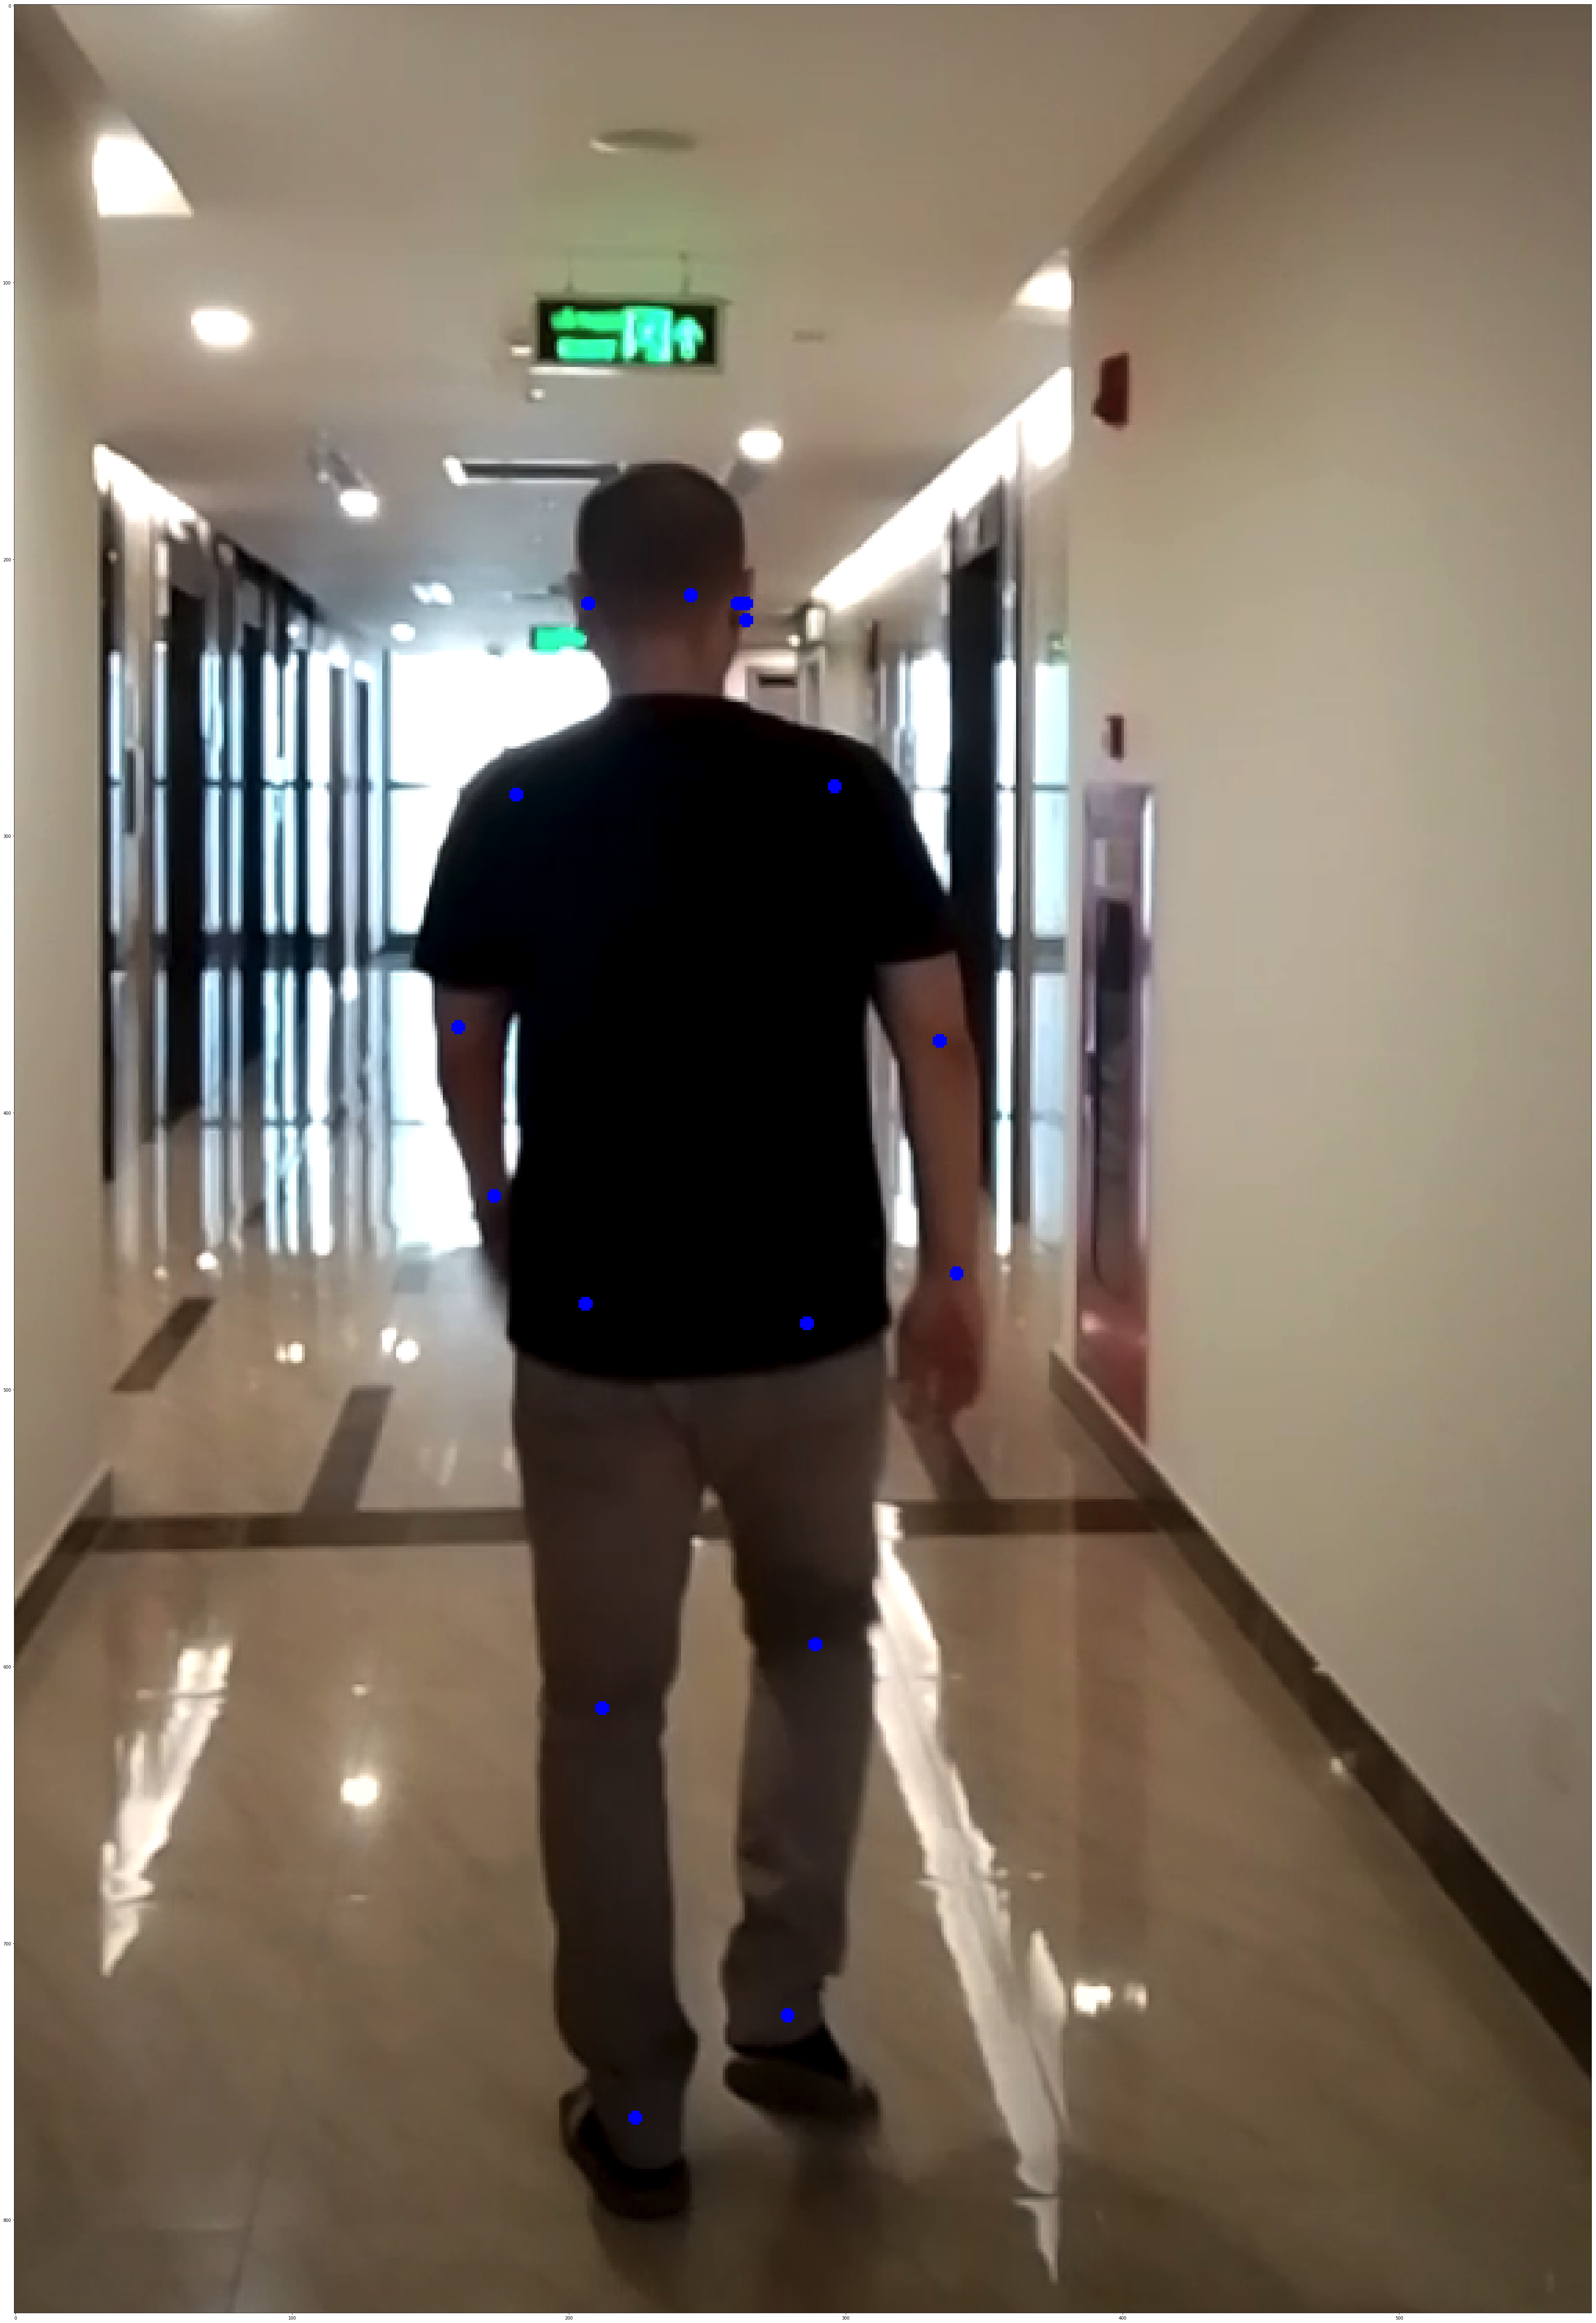

In [18]:
### Display Results with MatplotLib
from matplotlib import pyplot as plt
from torchvision.transforms.functional import to_pil_image
import numpy as np

fig, axis = plt.subplots(ncols=1, squeeze=False)
fig.set_figwidth(100)
fig.set_figheight(100)

img = to_pil_image(keypoints_image)
axis[0,0].imshow(np.array(img))

In [16]:
ls = kp[0][5]
rs = kp[0][6]

lh = kp[0][11]
rh = kp[0][12]

la = kp[0][15]
ra = kp[0][16]

def legToBack(s, h, a):
    return (a-h)/(h-s)

def hipToShoulder(ls, rs, lh, rh):
    return (rh-lh)/(rs-ls)

legRatio = legToBack(ls[1], lh[1], la[1])
hipRatio = hipToShoulder(ls[0], rs[0], lh[0], rh[0])


# ratio.append((legRatio.item(), hipRatio.item()))
# print(ratio)

In [17]:
print(legRatio.item(), hipRatio.item())

1.5968989133834839 0.6871166825294495
